In [27]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix, recall_score, precision_score
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [28]:
df = pd.read_csv("Crop_recommendation.csv")

X = df[["N", "P", "K", "temperature", "humidity", "ph", "rainfall"]]
y = df["label"]

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X,y_encoded,test_size=0.30,random_state=42,stratify=y_encoded)

In [30]:
svm_linear = SVC(kernel="linear", random_state=42)
svm_rbf    = SVC(kernel="rbf", random_state=42)

In [31]:
hyperparameters_rbf = {
    'gamma': [0.001, 0.01, 0.1, 1, 10],
    'C': [0.1, 1, 10, 100, 1000]
}

hyperparameters_linear = {
    'C': [0.1, 1, 10, 100, 1000]
}

grid_rbf = GridSearchCV(svm_rbf, hyperparameters_rbf, cv=5, scoring='accuracy')
grid_linear = GridSearchCV(svm_linear, hyperparameters_linear, cv=5, scoring='accuracy')
grid_rbf.fit(X_train, y_train)
grid_linear.fit(X_train, y_train)
best_rbf = grid_rbf.best_estimator_
best_linear = grid_linear.best_estimator_
print("Best RBF parameters:", grid_rbf.best_params_)
print("Best Linear parameters:", grid_linear.best_params_)

Best RBF parameters: {'C': 1, 'gamma': 0.001}
Best Linear parameters: {'C': 100}


In [32]:
y_pred_linear = best_rbf.predict(X_test)
y_pred_rbf    = best_linear.predict(X_test)

In [33]:
accuracy_linear = accuracy_score(y_test, y_pred_linear)
accuracy_rbf    = accuracy_score(y_test, y_pred_rbf)

f1_rbf =  f1_score(y_test, y_pred_rbf, average='macro')
f1_linear = f1_score(y_test, y_pred_linear, average='macro')

recall_rbf = recall_score(y_test, y_pred_rbf, average='macro')
recall_linear = recall_score(y_test, y_pred_linear, average='macro')

precision_rbf = precision_score(y_test, y_pred_rbf, average='macro')
precision_linear = precision_score(y_test, y_pred_linear, average='macro')

In [34]:

print("\n" + "="*50 + "\n")
print(f"Accuracy (Linear SVM): {accuracy_linear:.4f}")
print(f"Accuracy (RBF SVM): {accuracy_rbf:.4f}")
print(f"F1 Score (Linear SVM): {f1_linear:.4f}")
print(f"F1 Score (RBF SVM): {f1_rbf:.4f}")
print(f"Recall (Linear SVM): {recall_linear:.4f}")
print(f"Recall (RBF SVM): {recall_rbf:.4f}")
print(f"Precision (Linear SVM): {precision_linear:.4f}")
print(f"Precision (RBF SVM): {precision_rbf:.4f}")
print("\n" + "="*50 + "\n")




Accuracy (Linear SVM): 0.9894
Accuracy (RBF SVM): 0.9909
F1 Score (Linear SVM): 0.9893
F1 Score (RBF SVM): 0.9909
Recall (Linear SVM): 0.9894
Recall (RBF SVM): 0.9909
Precision (Linear SVM): 0.9910
Precision (RBF SVM): 0.9915




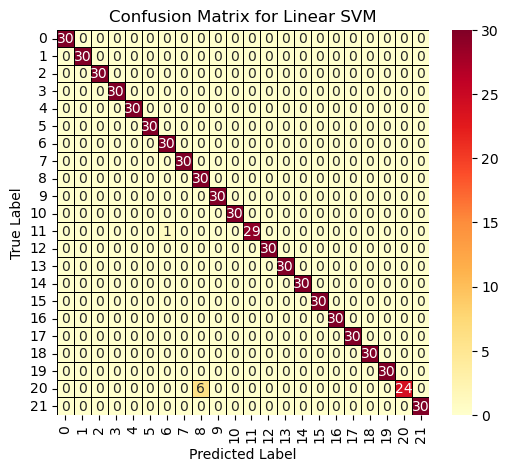

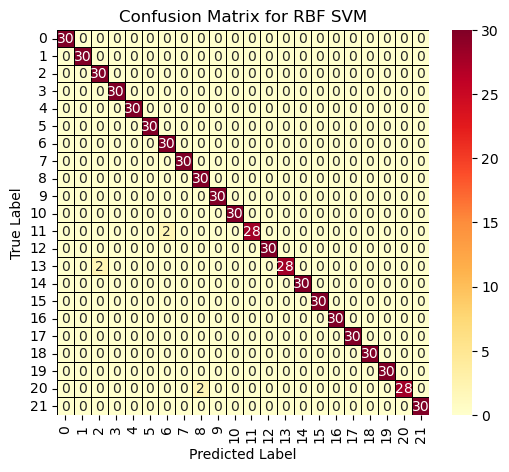

In [35]:
confusion_matrix_linear = confusion_matrix(y_test, y_pred_linear)
confusion_matrix_rbf = confusion_matrix(y_test, y_pred_rbf)
plt.figure(figsize=(6, 5))
sns.heatmap(confusion_matrix_linear, annot=True, fmt="d", cmap="YlOrRd", linewidths=0.5, linecolor="black")
plt.title('Confusion Matrix for Linear SVM')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()
plt.figure(figsize=(6, 5))
sns.heatmap(confusion_matrix_rbf, annot=True, fmt="d", cmap="YlOrRd", linewidths=0.5, linecolor="black")
plt.title('Confusion Matrix for RBF SVM')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()